<a href="https://colab.research.google.com/github/SofiaPenyaGonzalez/TRABAJOS/blob/main/A_PRACTICA1_GRUPO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRUPO 2**

Paloma Moya Tudela

María García Rodríguez

Elena Peral Pastor

Sofía Peña González



# RESUMEN

En la asignatura de “Aprendizaje Automático”, estamos aprendiendo acerca de una utilidad cada vez más desarrollada y puesta en práctica: las Redes de Neuronas Artificiales.

Este trabajo tiene como fin plasmar los conocimientos teórico-prácticos estudiados en clase aplicándolos a un ejemplo concreto: el “data set” de la empresa Zalando. Se ejecutarán diversas funciones y se irán extrayendo conclusiones que nos ayuden a comprender el funcionamiento interno de la red.


# ÍNDICE



*   Introducción
*   Resolución
*   Conclusiones
*   Reflexiones
*   Referencias Bibliográficas







# INTRODUCCIÓN

Las Redes de Neuronas Artificiales son una herramienta muy útil, y cada vez más utilizada, para resolver problemas cotidianos. Sin embargo, están siendo también de gran ayuda para hallar las respuestas a cuestiones increíblemente complejas.

La fuerte componente biológica sobre la que se sustenta llama considerablemente la atención, y es precisamente esta característica lo que las hace únicas.

Sin darnos cuenta, estas redes están siendo implementadas en multitud de campos, muchos de los cuales nos afectan – de manera directa o indirecta – en nuestro día a día. Tanto es así, que las empresas las implementan con el objetivo de ser capaces de lograr llamativos beneficios gracias a la eficacia de este método. Pueden ser empresas de distintas áreas; empresas como Zalando (www.zalando.com), una tienda de moda online alemana especializada en ventas de ropa y zapatos. Estos productos se van a trabajar a lo largo de este proyecto.

Este estudio se centrará en la manipulación de una red neuronal y en la interacción con sus diferentes componentes. De esta forma, será importante probar diferentes métodos de llevar a cabo una misma función, y así ser capaces de visualizar cómo funciona cada herramienta interna hasta llegar a las condiciones más óptimas posibles. Por lo tanto, esta práctica servirá de gran ayuda para entender el comportamiento de una Red de Neuronas Artificiales.


# RESOLUCIÓN

El primer paso será comprender el enunciado y extraer los datos que se nos aportan.

**PROBLEMA:**

* Reconocer y clasificar imágenes - en escala de grises - de ropa (28 x 28 píxeles) en sus diferentes tipologías (10). Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.
* Se dispone de 70k imágenes del conjunto de datos de Fashion-MNIST: artículos de Zalando, una tienda de moda online alemana especializada en ventas de ropa y zapatos. Se usarán 60K imágenes para el entrenamiento de la red, y 10K imágenes para evaluar la precisión con la que la red aprende a clasificarlas.


Una vez se tienen claro los materiales con los que se trabajará, se podrá empezar a incorporar código. Sin embargo, antes de comenzar importemnos qyuras y el resto de librerías necesarias para la red neuronal, asegurando que es la versión 2.0.0 (o superior) de TensorFlow.


**DISEÑO, ENTRENAMIENTO Y TEST DE UN SISTEMA DE REDES DE NEURONAS ARTIFICIALES**


In [40]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

import numpy as np
import pandas as pd
import matplotlib.image as mpim
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, InputLayer
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


A continuación, cargamos el conjunto de datos  MNIST en Keras para poder visualizar los datos.


In [41]:
# 2.- CARGAMOS EL CONJUNTO DE DATOS MINIST EN KERAS
# mnist = tf.keras.datasets.mnist
from keras.datasets import mnist

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


Al cargar el set de datos retorna cuatro arreglos en NumPy:
- `train_images` y `train_labels` son el **conjunto de entrenamiento** (los datos de los que aprenderá el modelo).
- `test_images` y `test_labels` son el conjunto de pruebas (los datos con los que testearemos el modelo ya entrenado).
- Las imágenes están **codificadas** como matrices `Numpy`, y las etiquetas son un vector de números con valores entre el 0 y el 9 (imágenes y etiquetas tienen una correspondencia 1 a 1) 


Como los `Class names` no están incluidos los podremos a mano en el siguiente código: 

In [42]:
nombres = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Una vez tenemos los datos preparados se puede proceder a echarle un vistazo a los **datos de entrenamiento**
## Pre-procesamiento del set de datos

In [43]:
print(train_images.shape)
print("len(train_labels:",len(train_labels))

(60000, 28, 28)
len(train_labels: 60000


Esto nos indica que el data set de los **datos de entrenamiento** contiene 60K elementos de 28x28, tal cual como indica el enunciado. Hagamos los mismos con los datos con los que estamos el modelo entrenado:


In [44]:
print(test_images.shape)
print("len(test_labels):",len(test_labels))

(10000, 28, 28)
len(test_labels): 10000


Apreciamos que es un array de 10K elementos de 28x28.


A continución, veamos la imágenes de otra forma, por ejemplo veamos la matriz de la imágen número 0

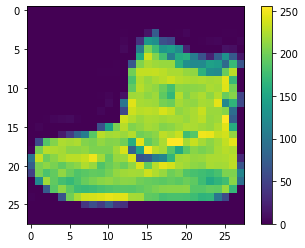

In [45]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Nos encontramos un porblema, se observa que los valores van de 0 a 250 y para aplicarlos a la red neuronal deben ser valores entre 0 y 1 para que los datos de entrenamiento y de test sean procesados de la misma manera. Para ello, vamos a arreglarlo de la siguiente manera:

In [46]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.0
test_images = test_images / 255.0


Una vez normalizado los datos, volvemos a imprimir los valores de entrada pero esta vez entre 0 y 1: 

In [47]:
print("train_images.shape:",train_images.shape)
print("len(train_labels:",len(train_labels))
print("test_images.shape:",test_images.shape)
print("len(test_labels):",len(test_labels))

train_images.shape: (60000, 28, 28)
len(train_labels: 60000
test_images.shape: (10000, 28, 28)
len(test_labels): 10000


In [48]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Volvamos a mostrar la imagen, los valores serán entre 0 y 1:

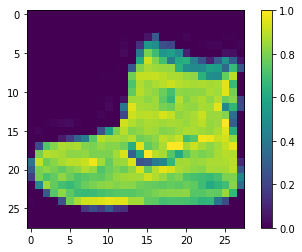

In [49]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

También podemos visualizarla en forma de matriz, veámos el ejemplo 2000, que debe ser similar a la imagen de un 'Sneaker', ahora los valores seguirán estando entre 0 y 1:



In [50]:
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[20000]))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]

Por último, antes de comenzar con la red neuronal incluimos una representación de los 10 primeros elemento con sus correspondientes etiquetas, de esta forma nos aseguramos de que el data set es correcto.

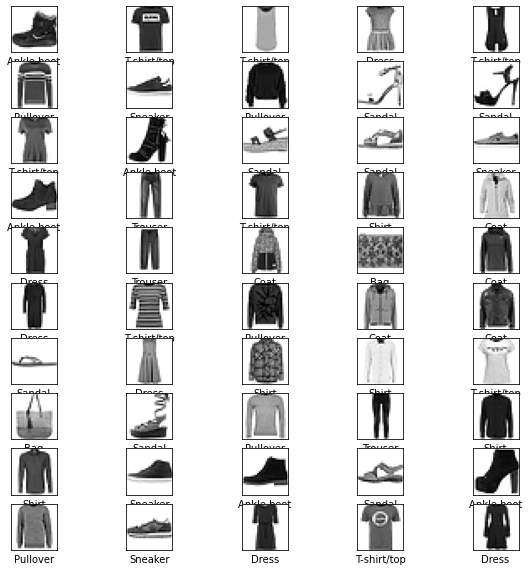

In [51]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(nombres[train_labels[i]])
plt.show()

## Configuración de los casos

**1. Configurar y entrenar los siguientes modelos de red de neuronas, todos con función de pérdida ‘categorical_crossentropy’, métrica de precisión y 5 épocas, analizando y reflexionando sobre los resultados.**


En este apartado, se dará a la RNA los datos de entrenamiento `train_images` y `train_labels`. Esta aprenderá a asociar imágenes y etiquetas, por lo que pediremos a la RNA que haga predicciones para `test_images` y comprobaremos si estas predicciones coinciden con las etiquetas de `test_labels`.

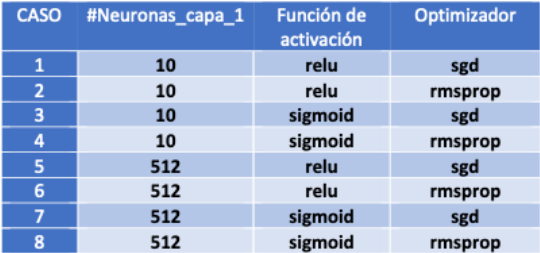



In [52]:
model1 = Sequential()
model1.add(Flatten(input_shape=(28, 28)))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model3 = Sequential()
model3.add(Flatten(input_shape=(28, 28)))
model3.add(Dense(10, activation='sigmoid'))
model3.add(Dense(10, activation='softmax'))

model4 = Sequential()
model4.add(Flatten(input_shape=(28, 28)))
model4.add(Dense(10, activation='sigmoid'))
model4.add(Dense(10, activation='softmax'))

model5 = Sequential()
model5.add(Flatten(input_shape=(28, 28)))
model5.add(Dense(512, activation='relu'))
model5.add(Dense(10, activation='softmax'))

model6 = Sequential()
model6.add(Flatten(input_shape=(28, 28)))
model6.add(Dense(512, activation='relu'))
model6.add(Dense(10, activation='softmax'))

model7 = Sequential()
model7.add(Flatten(input_shape=(28, 28)))
model7.add(Dense(512, activation='sigmoid'))
model7.add(Dense(10, activation='softmax'))

model8 = Sequential()
model8.add(Flatten(input_shape=(28, 28)))
model8.add(Dense(512, activation='sigmoid'))
model8.add(Dense(10, activation='softmax'))


casos=8
models=[]
model=[model1,model2,model3,model4,model5,model6,model7,model8]
for caso in range(casos):
  models.append(model)

In [53]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  model[caso].summary()
  print("\n\n")


CASO  1
---------------------------------
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_36 (Flatten)        (None, 784)               0         
                                                                 
 dense_69 (Dense)            (None, 10)                7850      
                                                                 
 dense_70 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________



CASO  2
---------------------------------
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_37 (Flatten)        (None, 784)               0         
       

In [54]:
model1.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model2.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model3.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model4.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model5.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model6.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model7.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model8.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])




1.   *loss*= función de coste (loss) que "dirige" el entrenamiento del modelo en la dirección correcta durante el proceso de entrenamiento.
2.   *optimizer*= tipo de optimización que usaremos para actualizar los parámetros del modelo durante el proceso de aprendizaje.
3.  *metrics* = la métrica que se usará para monitorizar los pasos de entrenamiento y prueba.
4.  *accuracy* = la fracción de las imágenes que están clasificadas correctamente.



In [55]:
for caso in range(casos):
  print("---------------------------------")
  print("CASO ",caso + 1)
  print("---------------------------------")
  model[caso].fit(train_images, train_labels, epochs=5)
  print("\n\n")

---------------------------------
CASO  1
---------------------------------
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0116 - accuracy: 0.6442
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6002 - accuracy: 0.7912
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5276 - accuracy: 0.8176
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4931 - accuracy: 0.8307
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4743 - accuracy: 0.8362



---------------------------------
CASO  2
---------------------------------
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6449 - accuracy: 0.7863
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4658 - accuracy: 0.8388
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4370 - accuracy: 0.8497
Epoch 4/5
1875/1875 [================

Vemos claramente que, para los datos de entrenamiento, el modelo que mejores valores nos da es el del` Caso 8`, con la menor pérdida (0.3032) y la mayor precisión (0.8901), en torno al 90%. Es lógico que sea uno de los casos con 512 neuronas porque está aprendiendo muchas mas carácterísticas de los datos de entrenamiento que los modelos con 10. Otra cosa serán los valores de pérdida y precisión con datos nuevos, que serán muy altos por overfitting.

Parece que la combinación de función activación sigmoid en la primera capa con optimizador rmsprop va bastante bien.

El que peor se comporta es el `Caso 3` con unas pérdidas más altas (0.8316) y una preción de solo el 70.50%. Parece que la combinación función activación sigmoid con optimizador sgd no va muy bien. De hecho se ve también con las 512 neuronas con esa misma combinación en el caso 7, que da los valores más bajos de precisión

In [56]:
test_loss = []
test_acc = []
for caso in range(casos):
  test_loss.append(model[caso].evaluate(test_images,  test_labels)[0])
  test_acc.append(model[caso].evaluate(test_images,  test_labels)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3574 - accuracy: 0.8728


In [57]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("PERDIDA CON LOS DATOS DE TEST: ",test_loss[caso])
  print("PRECISIÓN CON LOS DATOS DE TEST: ",test_acc[caso])
  print("\n\n")

CASO  1
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.49535176157951355
PRECISIÓN CON LOS DATOS DE TEST:  0.8267999887466431



CASO  2
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.4484816789627075
PRECISIÓN CON LOS DATOS DE TEST:  0.8446000218391418



CASO  3
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.7833263278007507
PRECISIÓN CON LOS DATOS DE TEST:  0.7396000027656555



CASO  4
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.45585712790489197
PRECISIÓN CON LOS DATOS DE TEST:  0.8436999917030334



CASO  5
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.44113412499427795
PRECISIÓN CON LOS DATOS DE TEST:  0.8413000106811523



CASO  6
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.4655349552631378
PRECISIÓN CON LOS DATOS DE TEST:  0.869700014591217



CASO  7
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.5570158362388611
PRECISIÓN C

Se vuelve a ver que, con los datos de Test, el **caso que mejor se comporta es el caso 8** (con las pérdidas mas bajas y las precisiones mas altas) y el de **peor comportamiento es el del caso 3, de nuevo**. Se ve que no ha habido excesivo sobreentrenamiendo debido al alto número de neuronas en la primera capa. Eso nos hace pensar que el número de neuronas en la primera capa afecta al overfiting menos que, por ejemplo, meter mas capas. (El caso 8 solo ha tenido un poco mas de pérdida con los datos de test, frente a los de entrenamiento y un poco menos de precisión (3pp) con los datos de test frente a los de entrenamiento)

##Análisis (5 épocas vs 25 épocas)

***3. Analizar e interpretar los resultados del caso 2 y el 7 frente a sus originales si se multiplica por 5 las épocas de entrenamiento (25).***

In [58]:
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='softmax'))

print("CASO 2")
print("---------------------------------")
model2.summary()
print("\n\n")

model2.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("---------------------------------")
print("CASO 2")
print("---------------------------------")
model2.fit(train_images, train_labels, epochs=25)
print("\n\n")

model7 = Sequential()
model7.add(Flatten(input_shape=(28, 28)))
model7.add(Dense(512, activation='sigmoid'))
model7.add(Dense(10, activation='softmax'))

print("CASO 7")
print("---------------------------------")
model7.summary()
print("\n\n")


model7.compile(optimizer='sgd',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("---------------------------------")
print("CASO 7")
print("---------------------------------")
model7.fit(train_images, train_labels, epochs=25)
print("\n\n")

CASO 2
---------------------------------
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_44 (Flatten)        (None, 784)               0         
                                                                 
 dense_85 (Dense)            (None, 10)                7850      
                                                                 
 dense_86 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________



---------------------------------
CASO 2
---------------------------------
Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6653 - accuracy: 0.7788
Epoch 2/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4819 - accuracy:

  - Caso 2
    * Para los datos de entrenamiento
      - La pérdida baja de 0.4139 a 0.3546.
      - La precisión aumenta de 0.8562 a 0.8773.
  - Caso 7
    * Para los datos de entrenamiento
      - La pérdida disminuye de 0.8089 a 0.4162 .
      - La precisión aumenta de 0.3032 a 0.8551 cosa que es espectacular
    

## Predicciones

Con el modelo entrenado, podemos empezar a usarlo para hacer predicciones sobre algunas imágenes (usemos por comodidad alguna de las imágenes de prueba que ya tenemos cargadas en el notebook). Lo haremos, como pide el enunciado, con la sexta imagen (la que tiene índice 5 en el array)

In [59]:
test_labels[5]

1

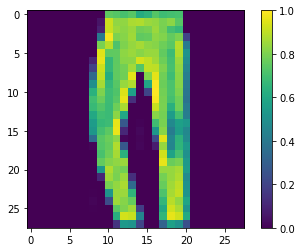

In [60]:
plt.figure()
plt.imshow(test_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

Las predicciones serán arreglos de 10 para los primeros 4 modelos y de 512 para los restantes.

In [61]:
print("CASO 1")
prediction1=model1.predict(test_images)
print(prediction1[5])
np.argmax(prediction1[5])

CASO 1
313/313 [==============================] - 1s 1ms/step
[0.   0.99 0.   0.   0.01 0.   0.   0.   0.   0.  ]


1

In [62]:
print("CASO 2")
prediction2=model2.predict(test_images)
print(prediction2[5])
np.argmax(prediction2[5])

CASO 2
313/313 [==============================] - 0s 1ms/step
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


1

In [63]:
print("CASO 3")
prediction3=model3.predict(test_images)
print(prediction3[5])
np.argmax(prediction3[5])

CASO 3
313/313 [==============================] - 0s 1ms/step
[0.04 0.84 0.01 0.06 0.01 0.02 0.02 0.   0.   0.  ]


1

In [64]:
print("CASO 4")
prediction4=model4.predict(test_images)
print(prediction4[5])
np.argmax(prediction4[5])

CASO 4
313/313 [==============================] - 0s 1ms/step
[0.04 0.96 0.   0.   0.   0.   0.   0.   0.   0.  ]


1

In [65]:
print("CASO 5")
prediction5=model5.predict(test_images)
print(prediction5[5])
np.argmax(prediction5[5])

CASO 5
313/313 [==============================] - 1s 3ms/step
[0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]


1

In [66]:
print("CASO 6")
prediction6=model6.predict(test_images)
print(prediction6[5])
np.argmax(prediction6[5])

CASO 6
313/313 [==============================] - 1s 3ms/step
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


1

In [67]:
print("CASO 7")
prediction7=model7.predict(test_images)
print(prediction7[5])
np.argmax(prediction7[5])

CASO 7
313/313 [==============================] - 1s 3ms/step
[0.   0.99 0.   0.   0.01 0.   0.   0.   0.   0.  ]


1

In [68]:
print("CASO 8")
prediction8=model8.predict(test_images)
print(prediction8[5])
np.argmax(prediction8[5])

CASO 8
313/313 [==============================] - 1s 3ms/step
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


1

El modelo está más seguro que esta imagen son unos pantalones (trousers) que otra cosa. Vemos la etiqueta de clasificación

Aprovechemos que este conjunto de datos es más rico visualmente para presentar gráficamente cómo de bien o de mal se comporta el modelo. Para ello, usaremos esta función extraída del tutorial de TensorFlow

## Gráficas


***6. Utilice el siguiente código para graficar cómo de bien o de mal se comporta el modelo para cada uno de los 8 casos.***

En las gráficas se verán los siguientes colores:

- azul = valores menores del las otras prediciones

- rojo = el valor interpretadopor el modelo
- negro= el valor de la categoría real

Incluimos las funciones necesarias en los siguientes códigos.

In [69]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(nombres[predicted_label],
                                100*np.max(predictions_array),
                                nombres[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="blue")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')


En los casos se interpreta lo mismo que en le apartado anterior de forma gráfica para las 10 primeras imágenes de testeo.

El objetivo será encontrar gráficas con una única, la negra, que significa que ha acertado.

Las etiquetas de predicción correcta las pintaremos de negro y las etiquetas de predicción incorrecta las colorearemos de rojo.El número da el porcentaje (de 100) para la etiqueta predicha.

**Caso 1 - Caso 8 en la imagen 6**

In [70]:
casos=8
predictions=[]
prediction=[prediction1,prediction2,prediction3,prediction4,prediction5,prediction6,prediction7,prediction8]
for caso in range(casos):
  predictions.append(prediction)

----------------------------------------------------------
PREDICCIONES CASO  1  FIGURA  5


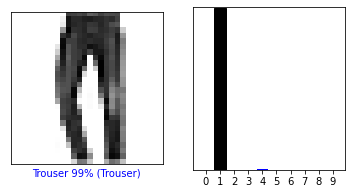

----------------------------------------------------------
PREDICCIONES CASO  2  FIGURA  5


<Figure size 432x288 with 0 Axes>

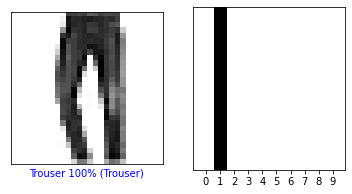

----------------------------------------------------------
PREDICCIONES CASO  3  FIGURA  5


<Figure size 432x288 with 0 Axes>

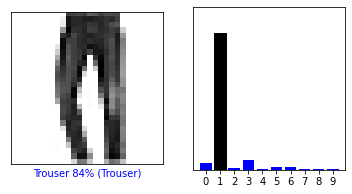

----------------------------------------------------------
PREDICCIONES CASO  4  FIGURA  5


<Figure size 432x288 with 0 Axes>

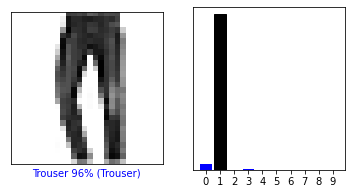

----------------------------------------------------------
PREDICCIONES CASO  5  FIGURA  5


<Figure size 432x288 with 0 Axes>

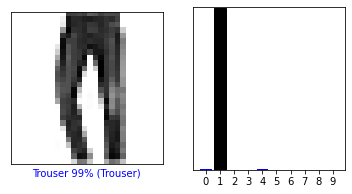

----------------------------------------------------------
PREDICCIONES CASO  6  FIGURA  5


<Figure size 432x288 with 0 Axes>

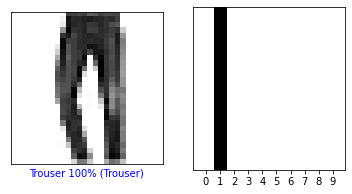

----------------------------------------------------------
PREDICCIONES CASO  7  FIGURA  5


<Figure size 432x288 with 0 Axes>

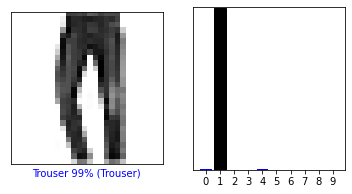

----------------------------------------------------------
PREDICCIONES CASO  8  FIGURA  5


<Figure size 432x288 with 0 Axes>

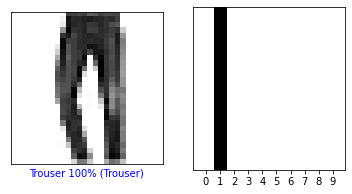

<Figure size 432x288 with 0 Axes>

In [71]:
for caso in range(casos):
  print("----------------------------------------------------------")
  print("PREDICCIONES CASO ", caso + 1 , " FIGURA ", 5)
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(5, prediction[caso][5], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(5, prediction[caso][5],  test_labels)
  plt.show()
  plt.clf()

Vemos claramente como, para el caso del objeto 6, con cada uno de los 8 casos identifica que son unos pantalones con una precisión diferente, siendo el octabo caso el de mayor precisión

**Caso 1 - Caso 8 en la imagen 8**

----------------------------------------------------------
PREDICCIONES CASO  1  FIGURA  8


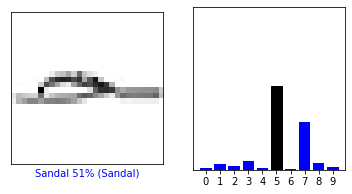

----------------------------------------------------------
PREDICCIONES CASO  2  FIGURA  8


<Figure size 432x288 with 0 Axes>

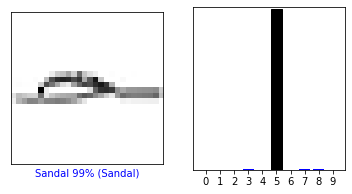

----------------------------------------------------------
PREDICCIONES CASO  3  FIGURA  8


<Figure size 432x288 with 0 Axes>

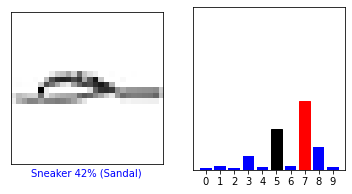

----------------------------------------------------------
PREDICCIONES CASO  4  FIGURA  8


<Figure size 432x288 with 0 Axes>

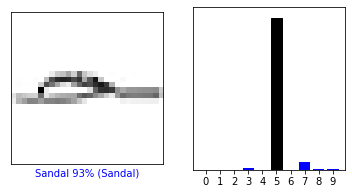

----------------------------------------------------------
PREDICCIONES CASO  5  FIGURA  8


<Figure size 432x288 with 0 Axes>

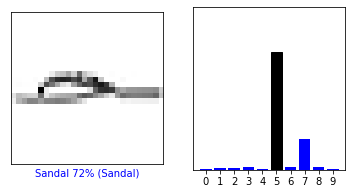

----------------------------------------------------------
PREDICCIONES CASO  6  FIGURA  8


<Figure size 432x288 with 0 Axes>

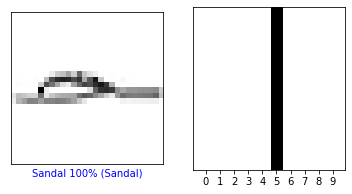

----------------------------------------------------------
PREDICCIONES CASO  7  FIGURA  8


<Figure size 432x288 with 0 Axes>

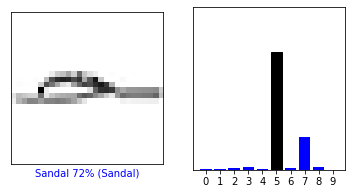

----------------------------------------------------------
PREDICCIONES CASO  8  FIGURA  8


<Figure size 432x288 with 0 Axes>

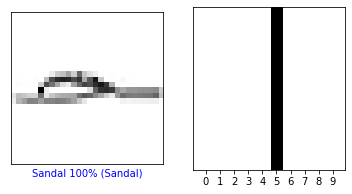

<Figure size 432x288 with 0 Axes>

In [72]:
for caso in range(casos):
  print("----------------------------------------------------------")
  print("PREDICCIONES CASO ", caso + 1 , " FIGURA ", 8)
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(8, prediction[caso][8], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(8, prediction[caso][8],  test_labels)
  plt.show()
  plt.clf()

Vemos para la figura 8 (una sandalia) y el caso 3, realmente no está seguro de que objeto se trata, cuando en el caso 8, está totalmente seguro

Visualicemos varias imágenes con sus predicciones para los 8 casos. Se debe tener en cuenta que el modelo puede estar equivocado, incluso cuando tiene mucha confianza en la clasificación sobre una de las clases.

----------------------------------------------------------
PREDICCIONES CASO  1  FIGURAS  8  x  8


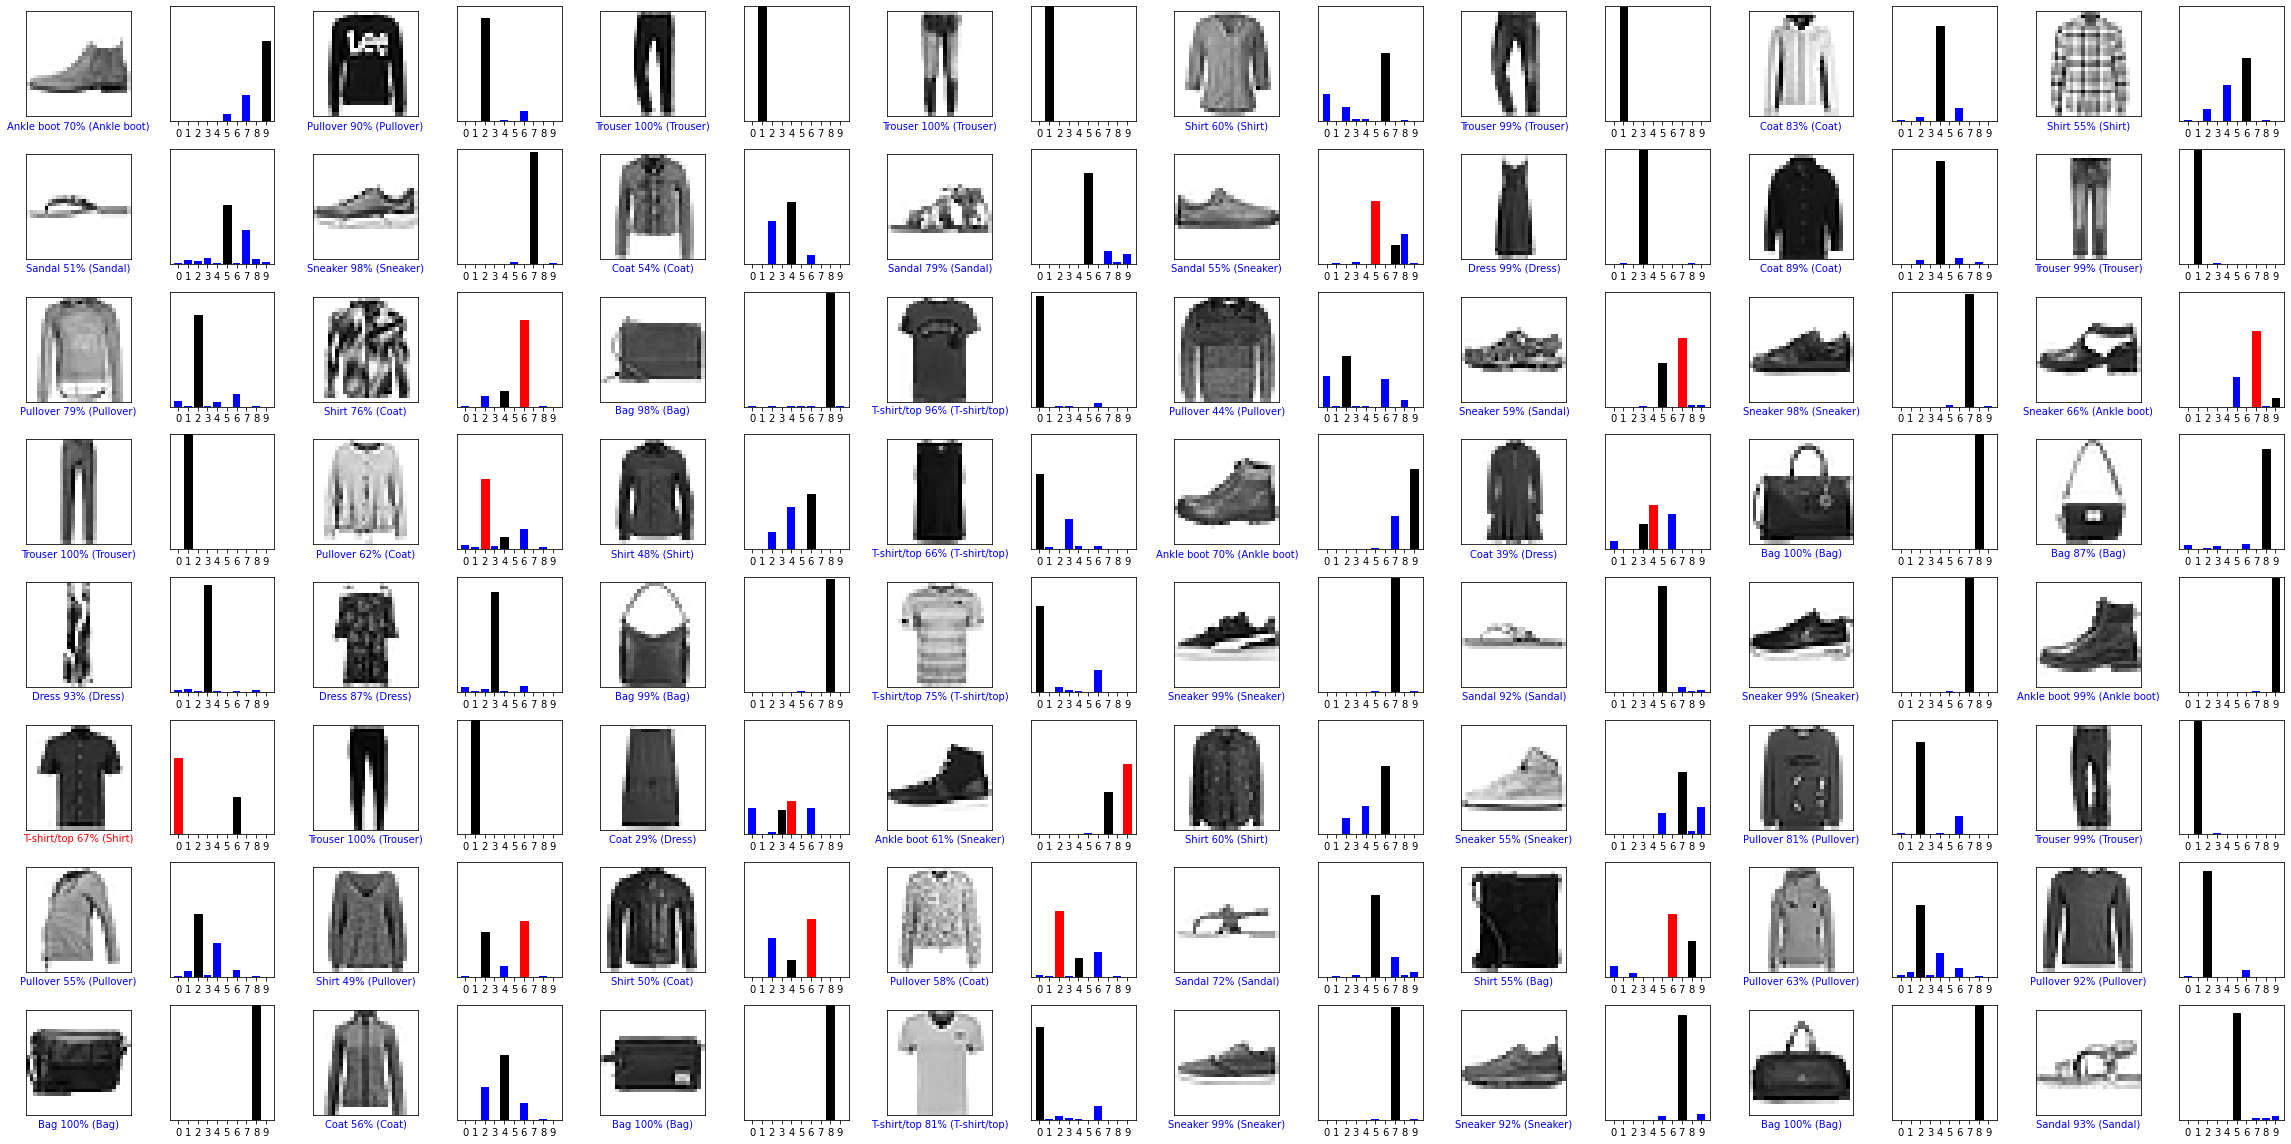




----------------------------------------------------------
PREDICCIONES CASO  2  FIGURAS  8  x  8


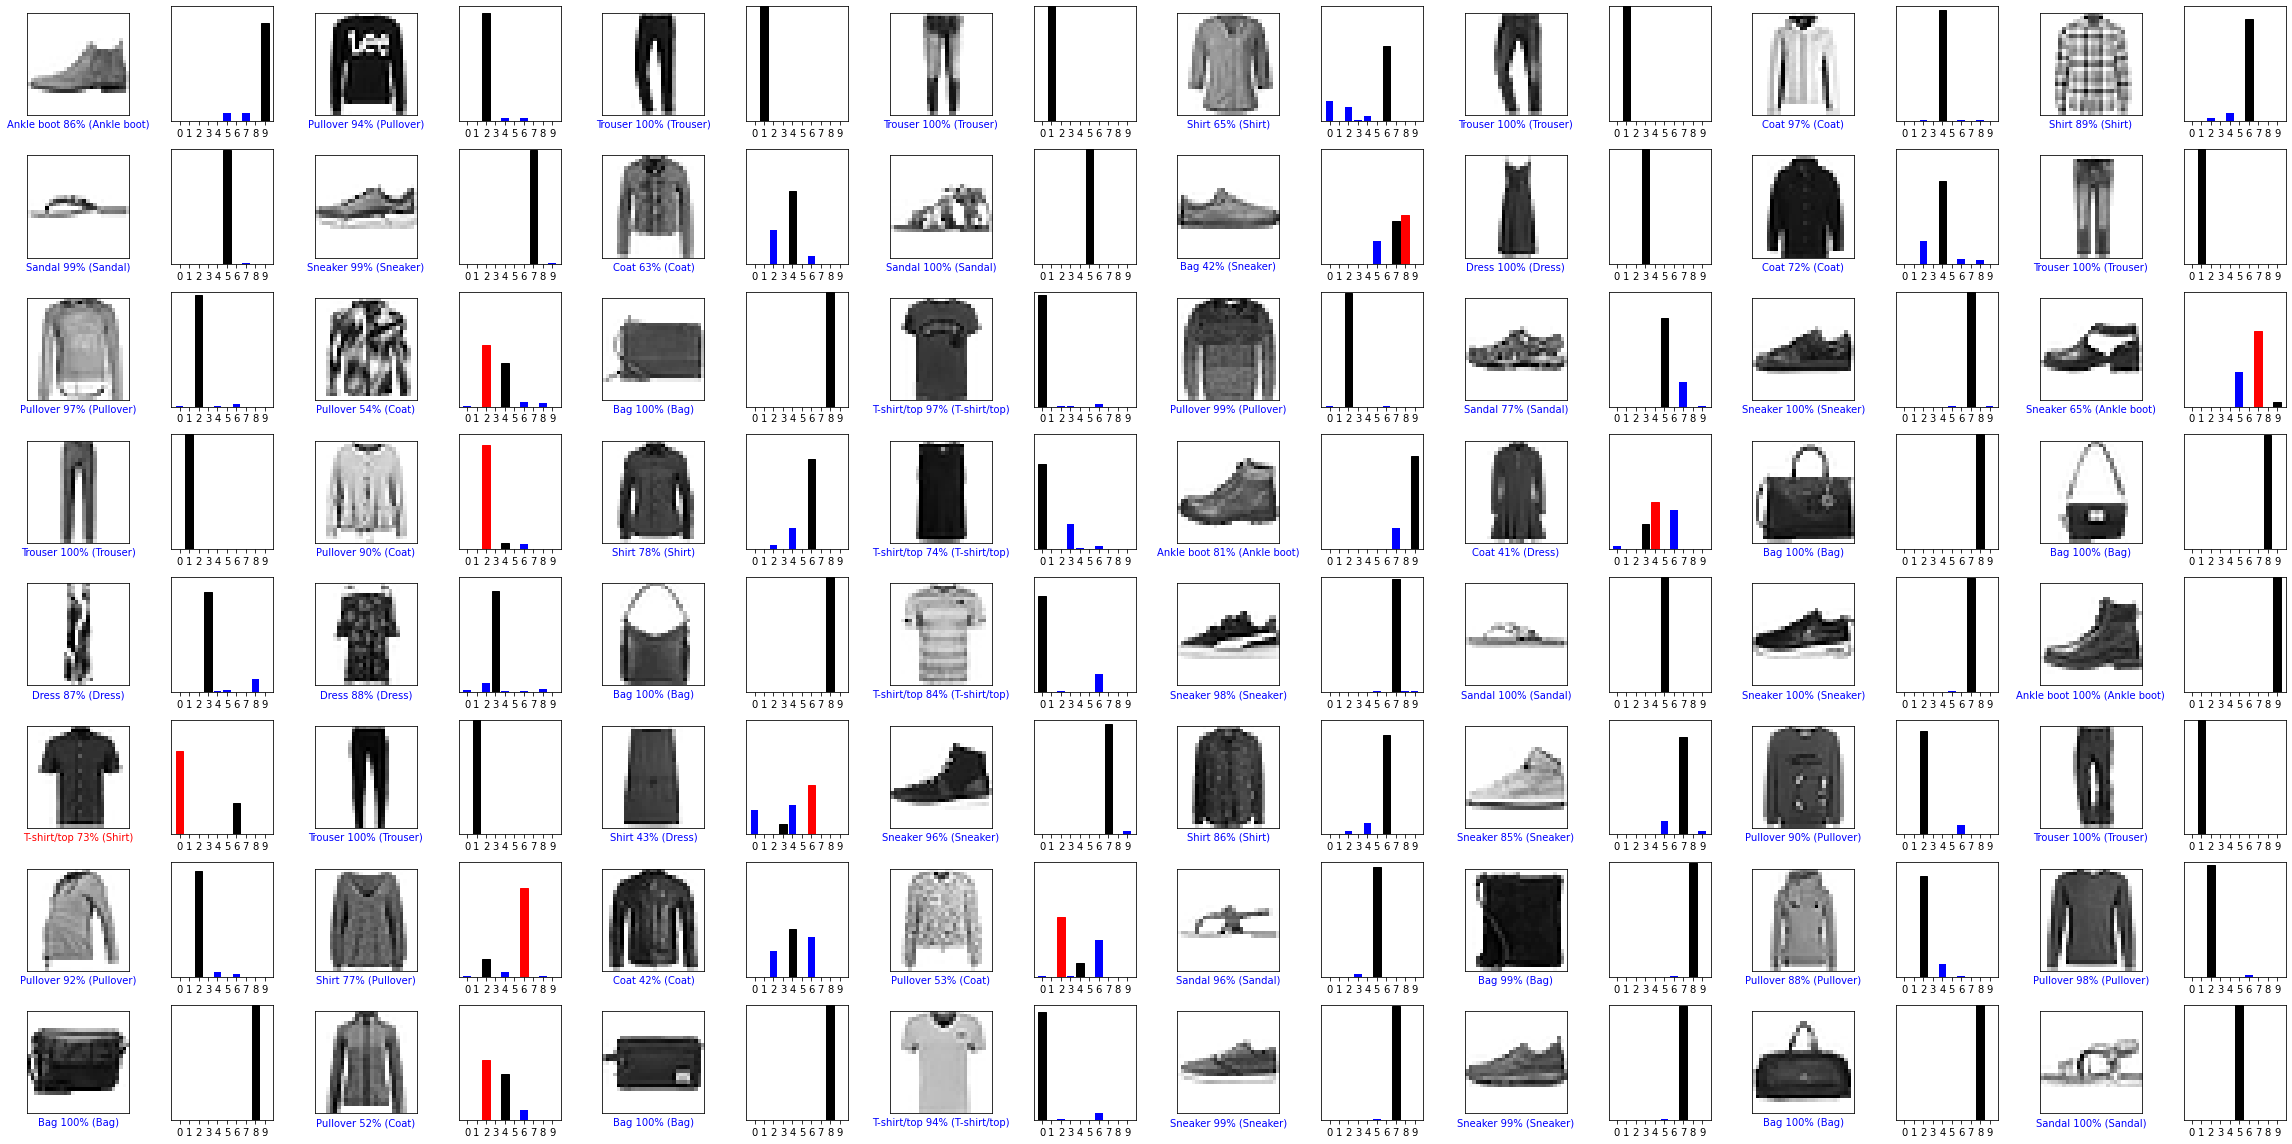




----------------------------------------------------------
PREDICCIONES CASO  3  FIGURAS  8  x  8


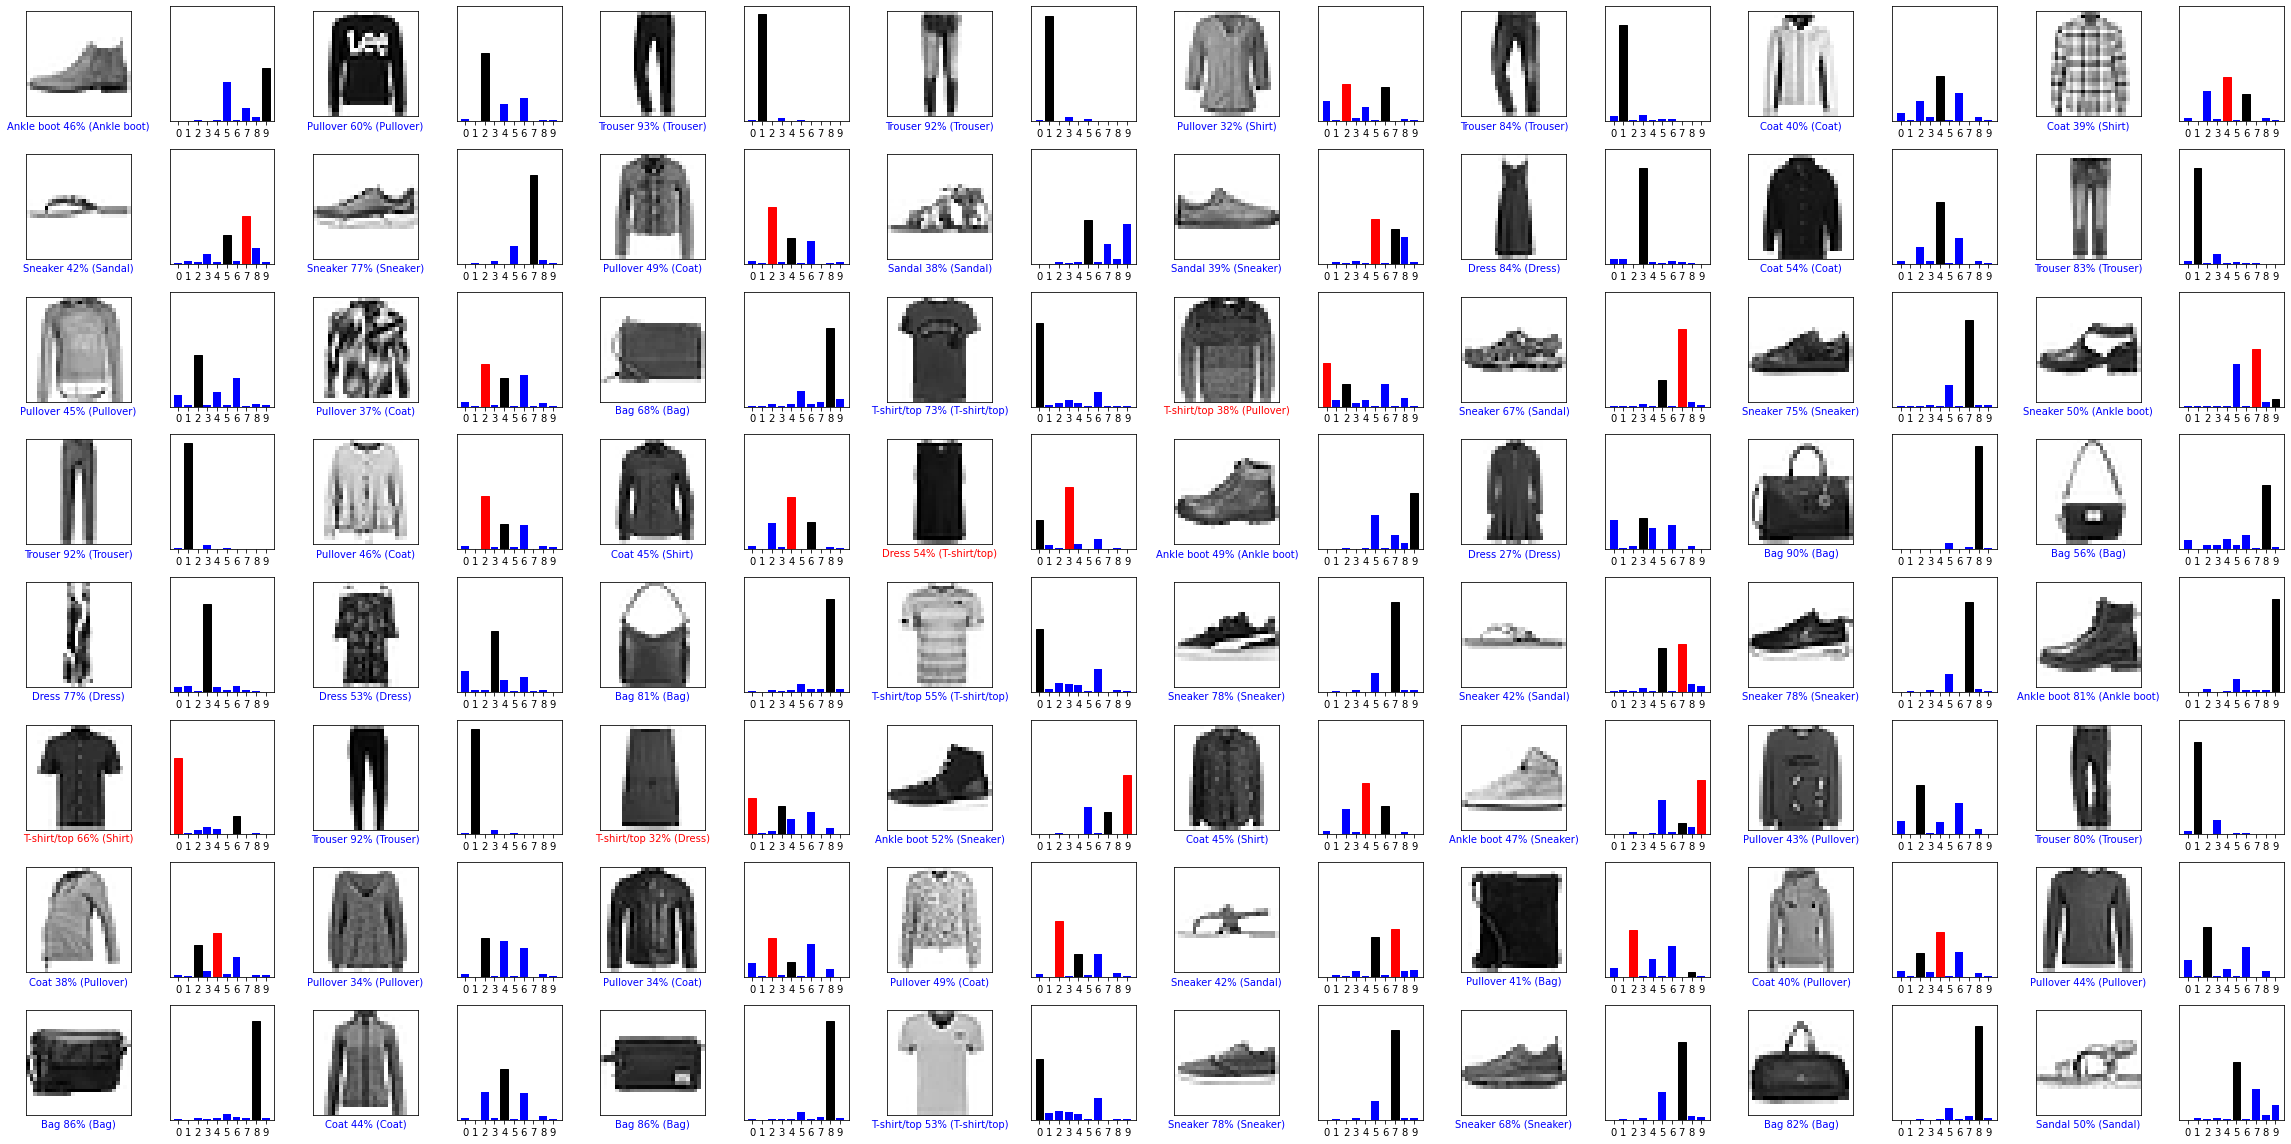




----------------------------------------------------------
PREDICCIONES CASO  4  FIGURAS  8  x  8


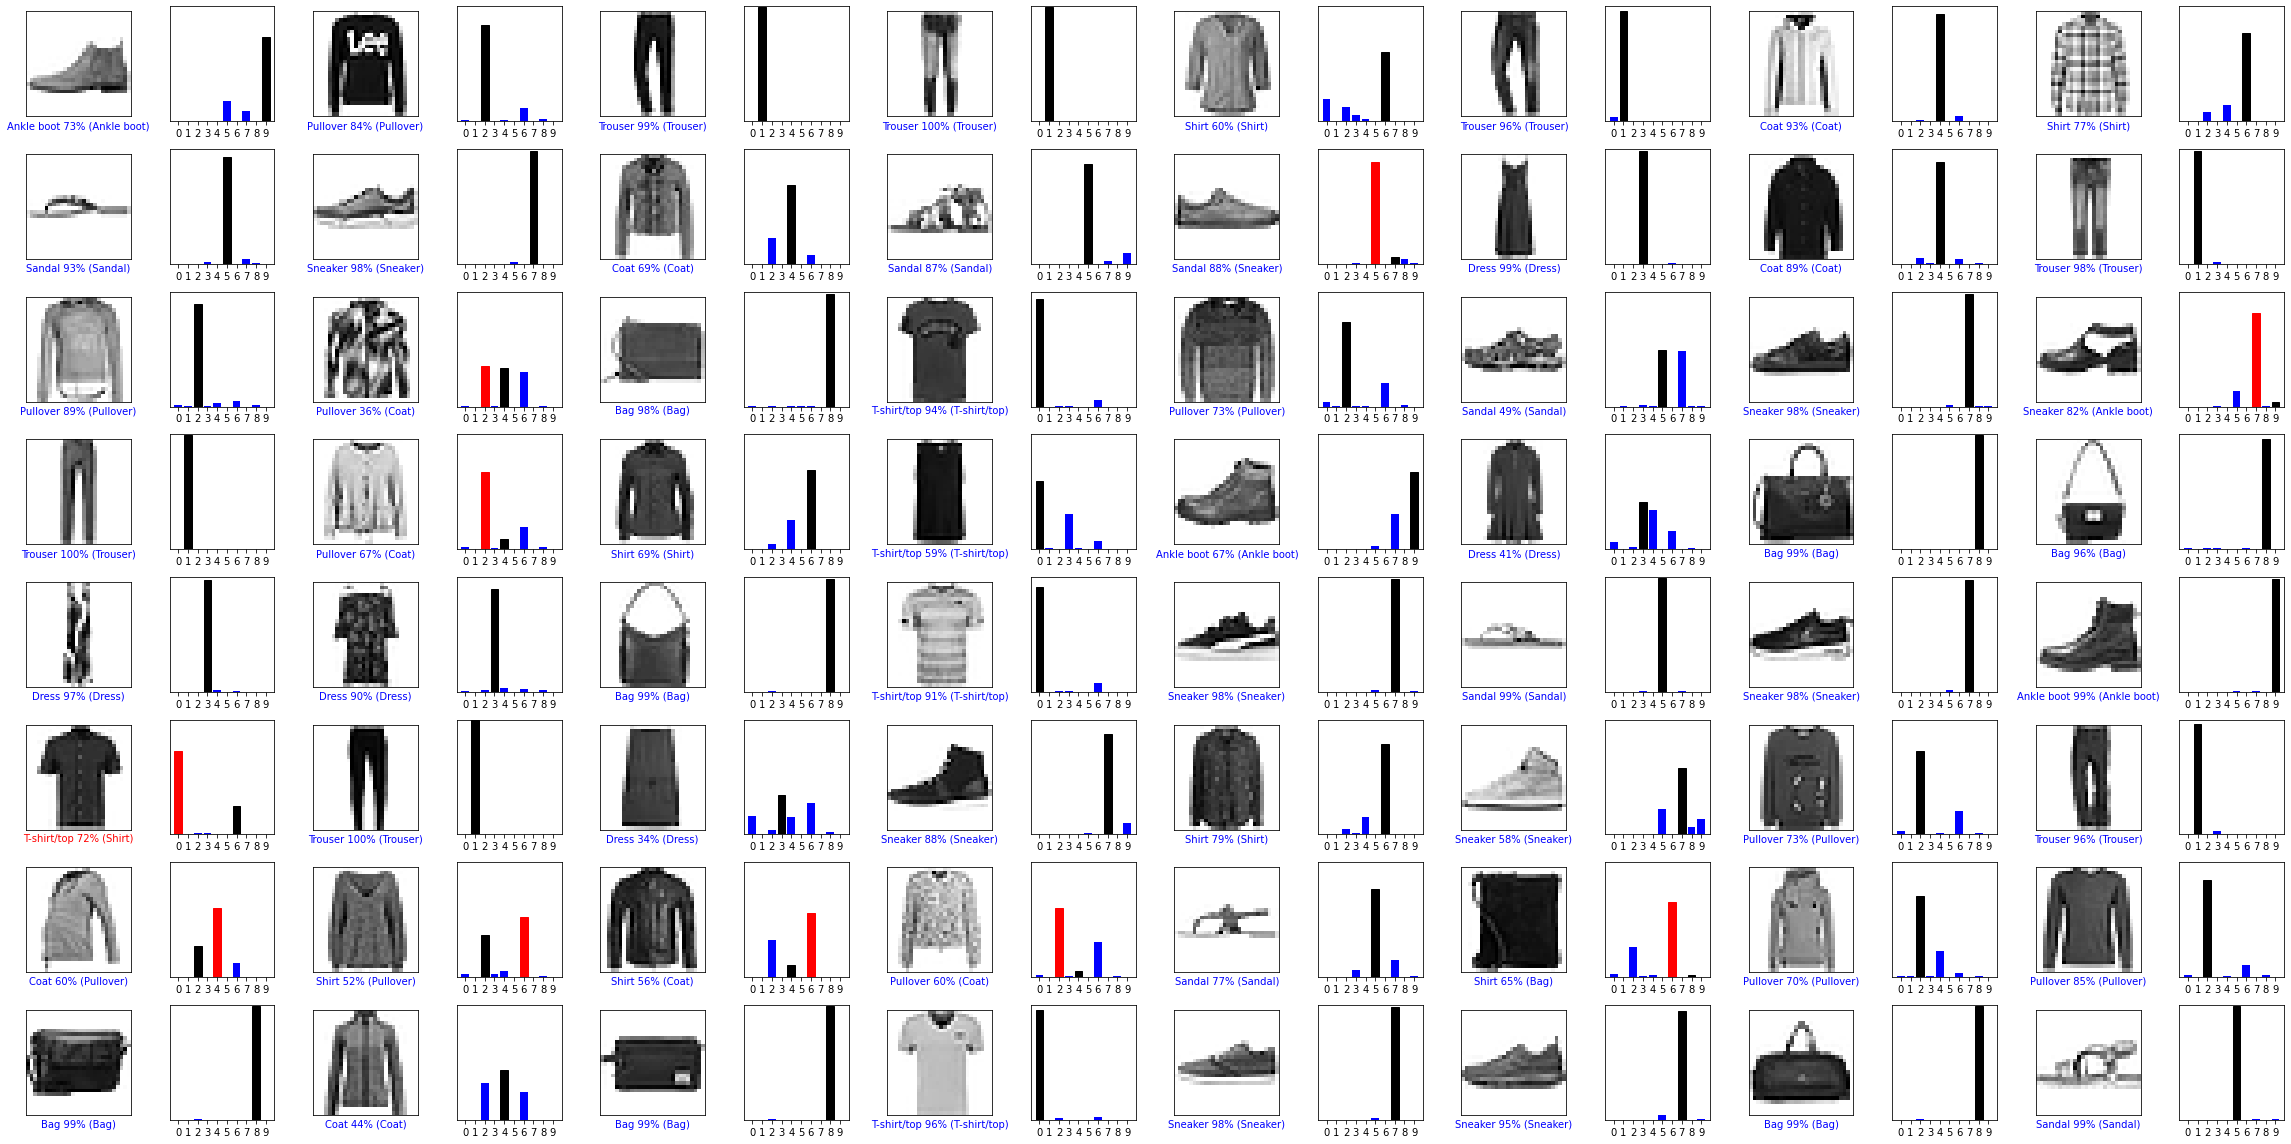




----------------------------------------------------------
PREDICCIONES CASO  5  FIGURAS  8  x  8


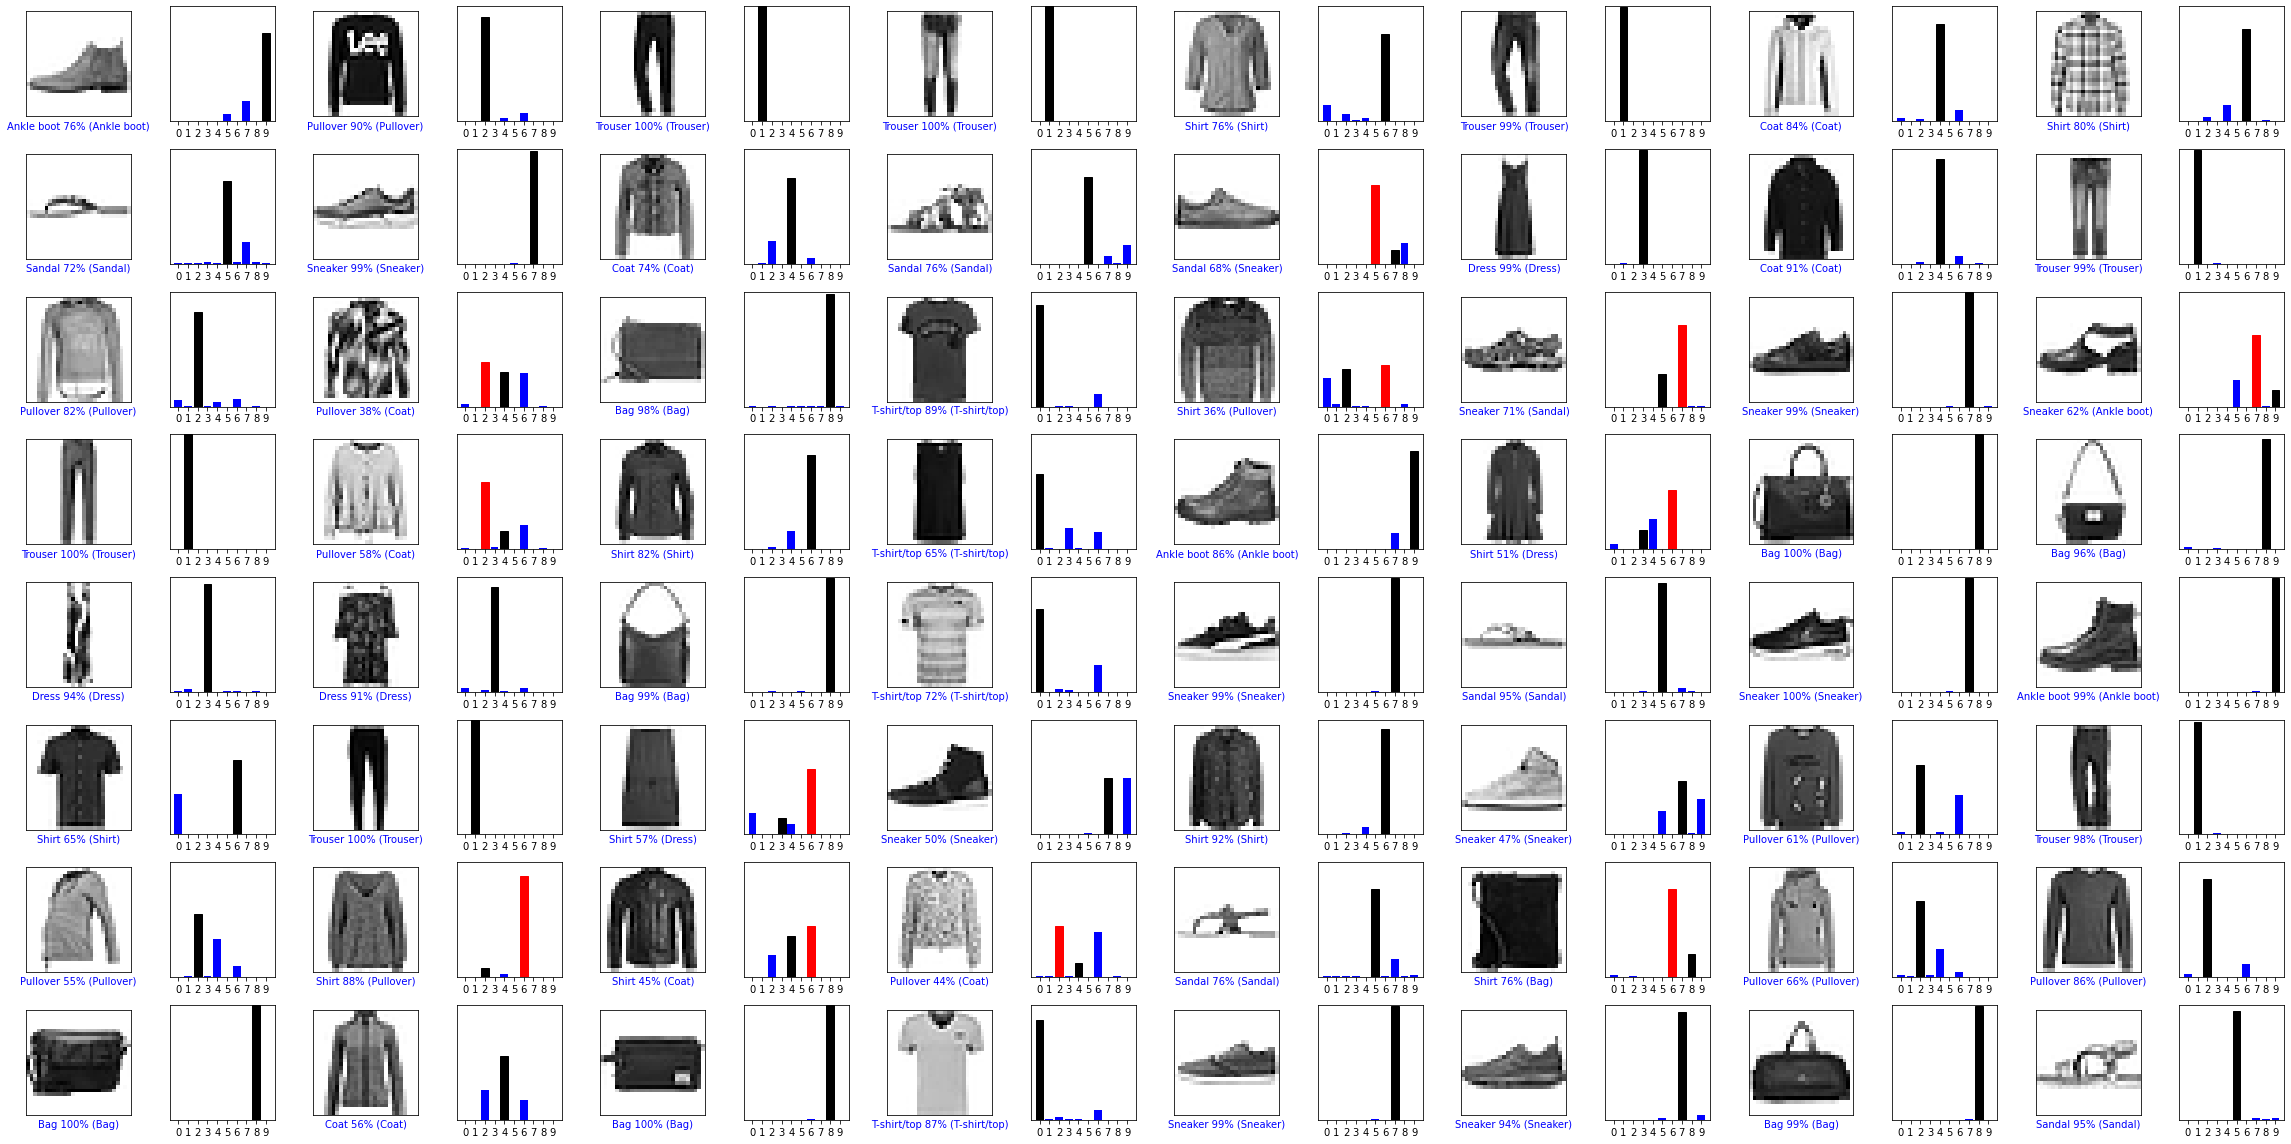




----------------------------------------------------------
PREDICCIONES CASO  6  FIGURAS  8  x  8


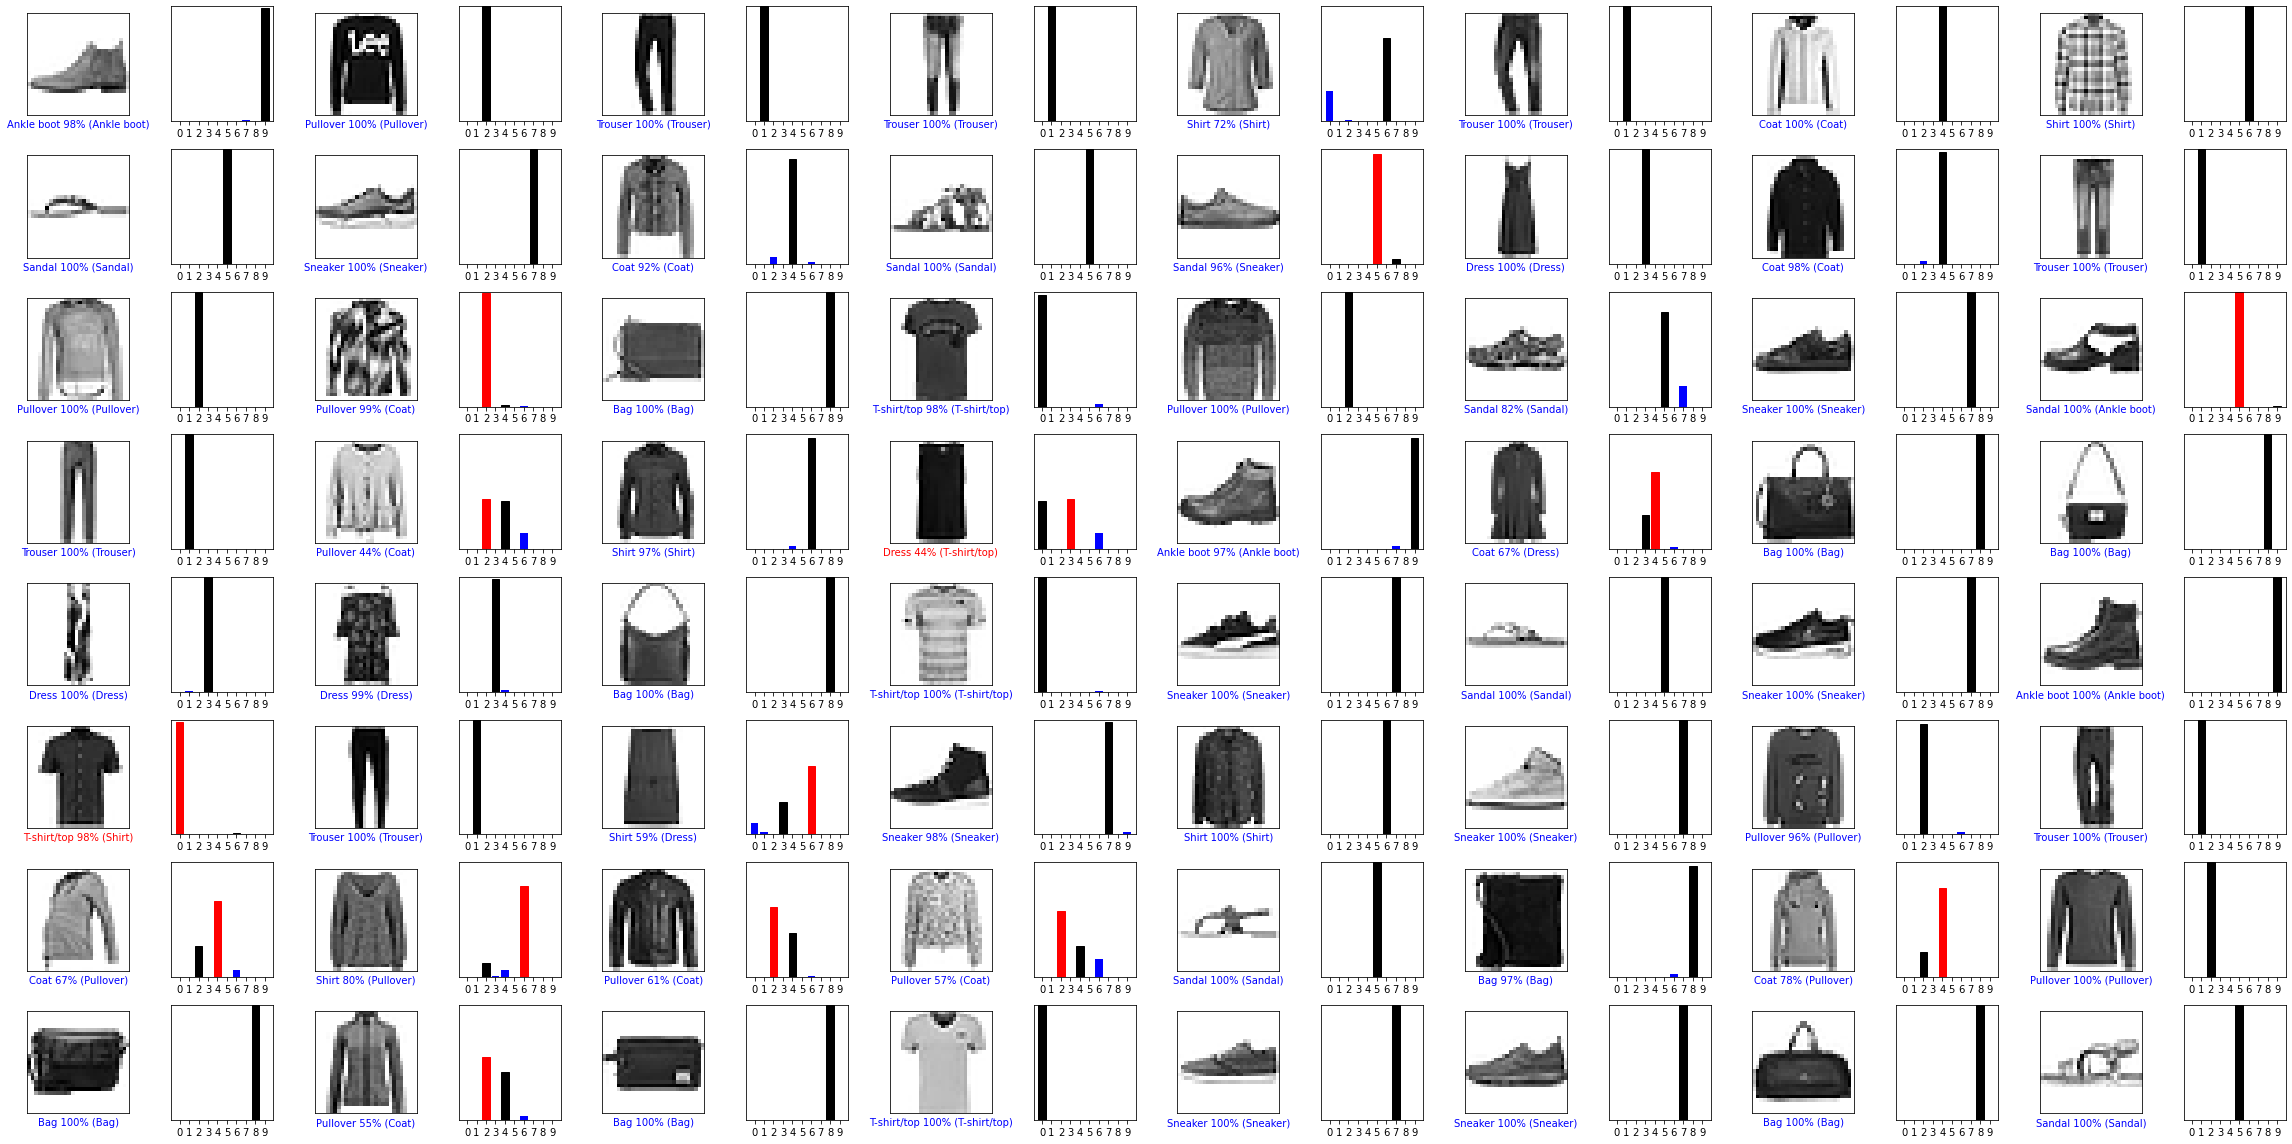




----------------------------------------------------------
PREDICCIONES CASO  7  FIGURAS  8  x  8


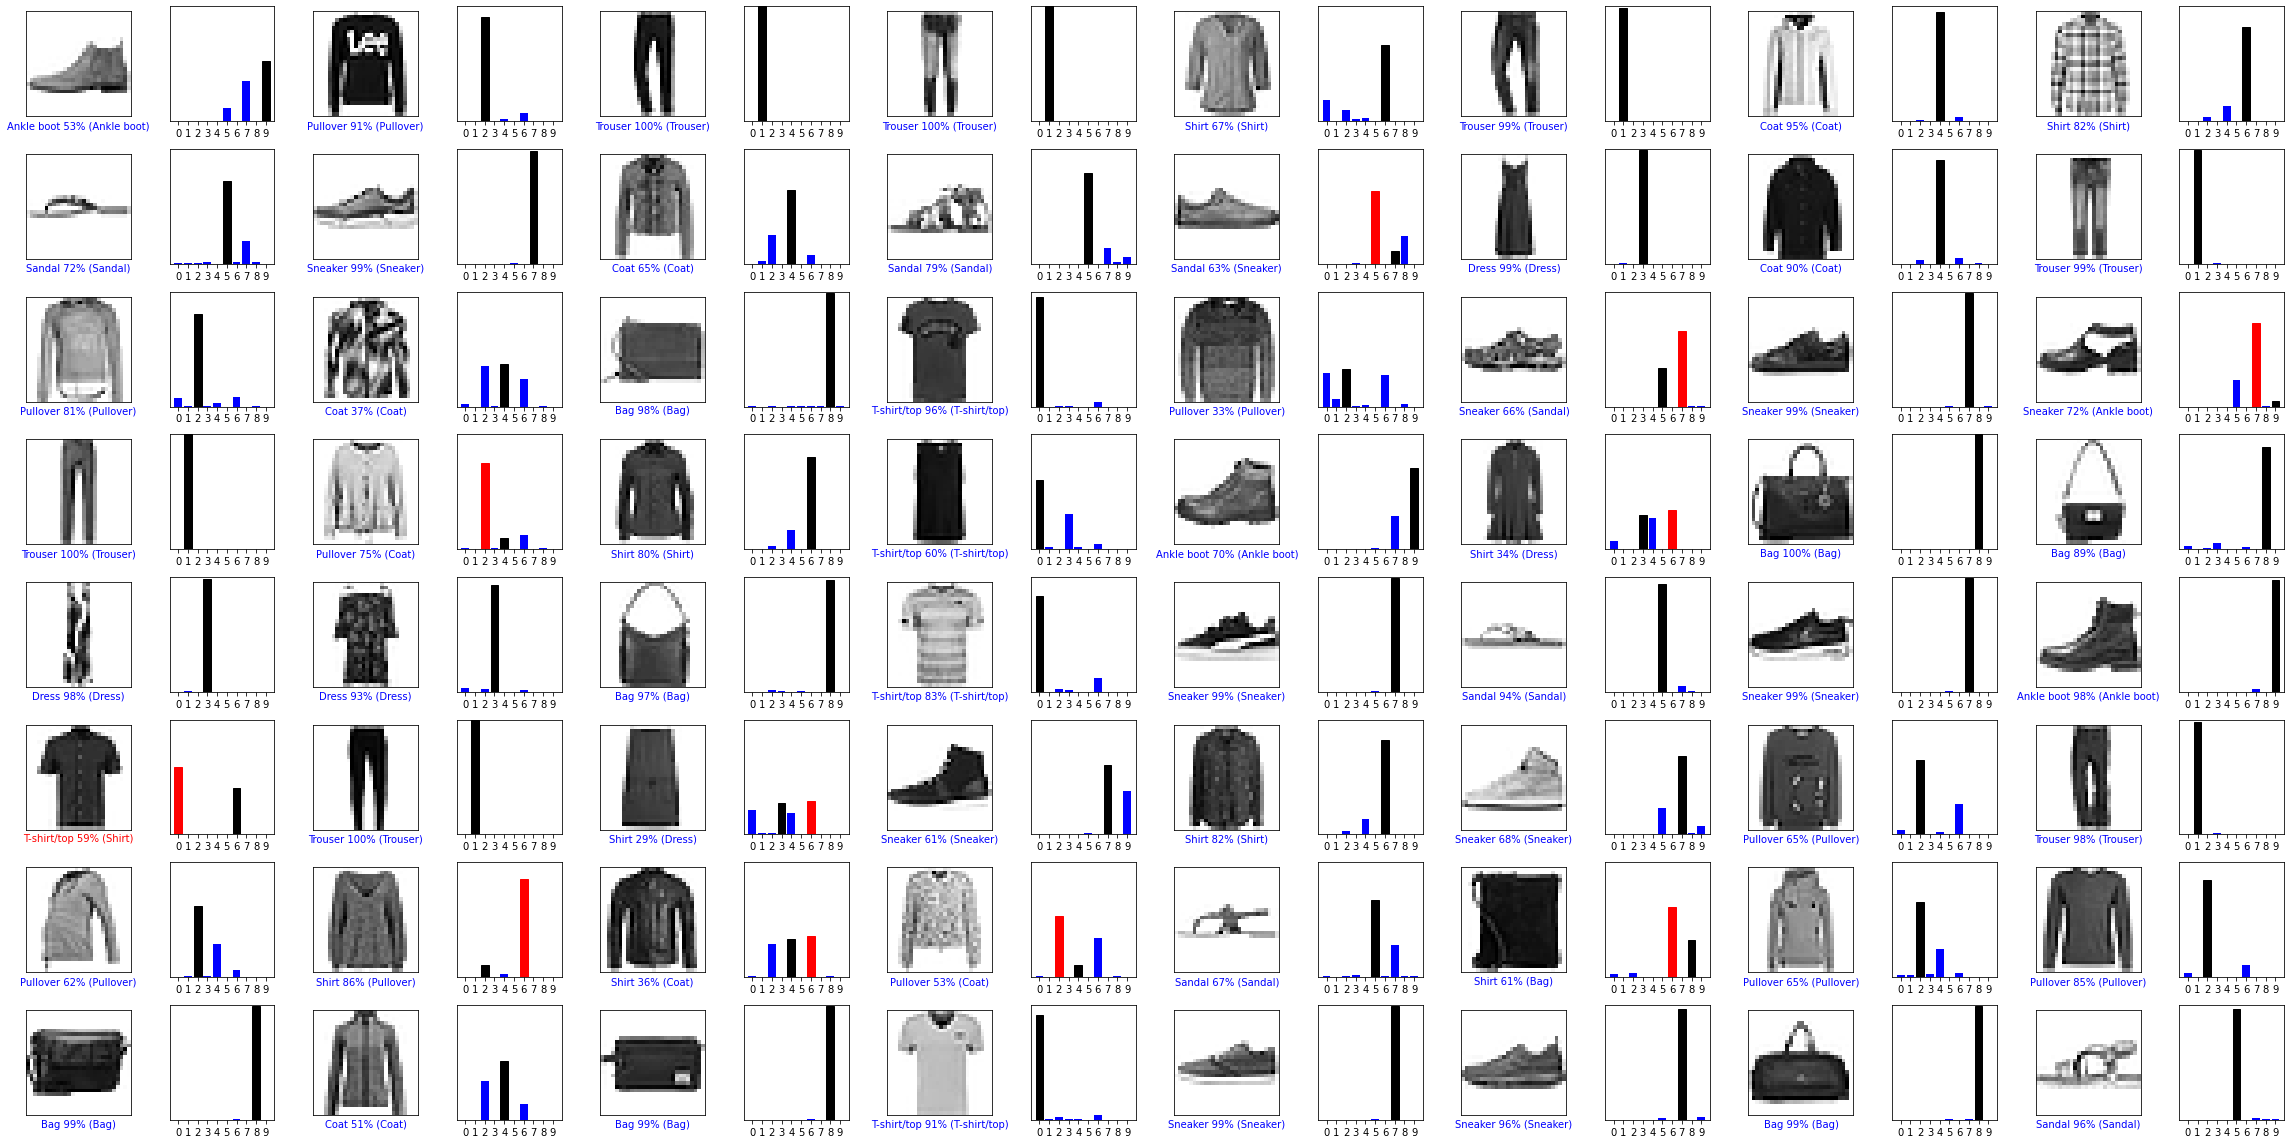




----------------------------------------------------------
PREDICCIONES CASO  8  FIGURAS  8  x  8


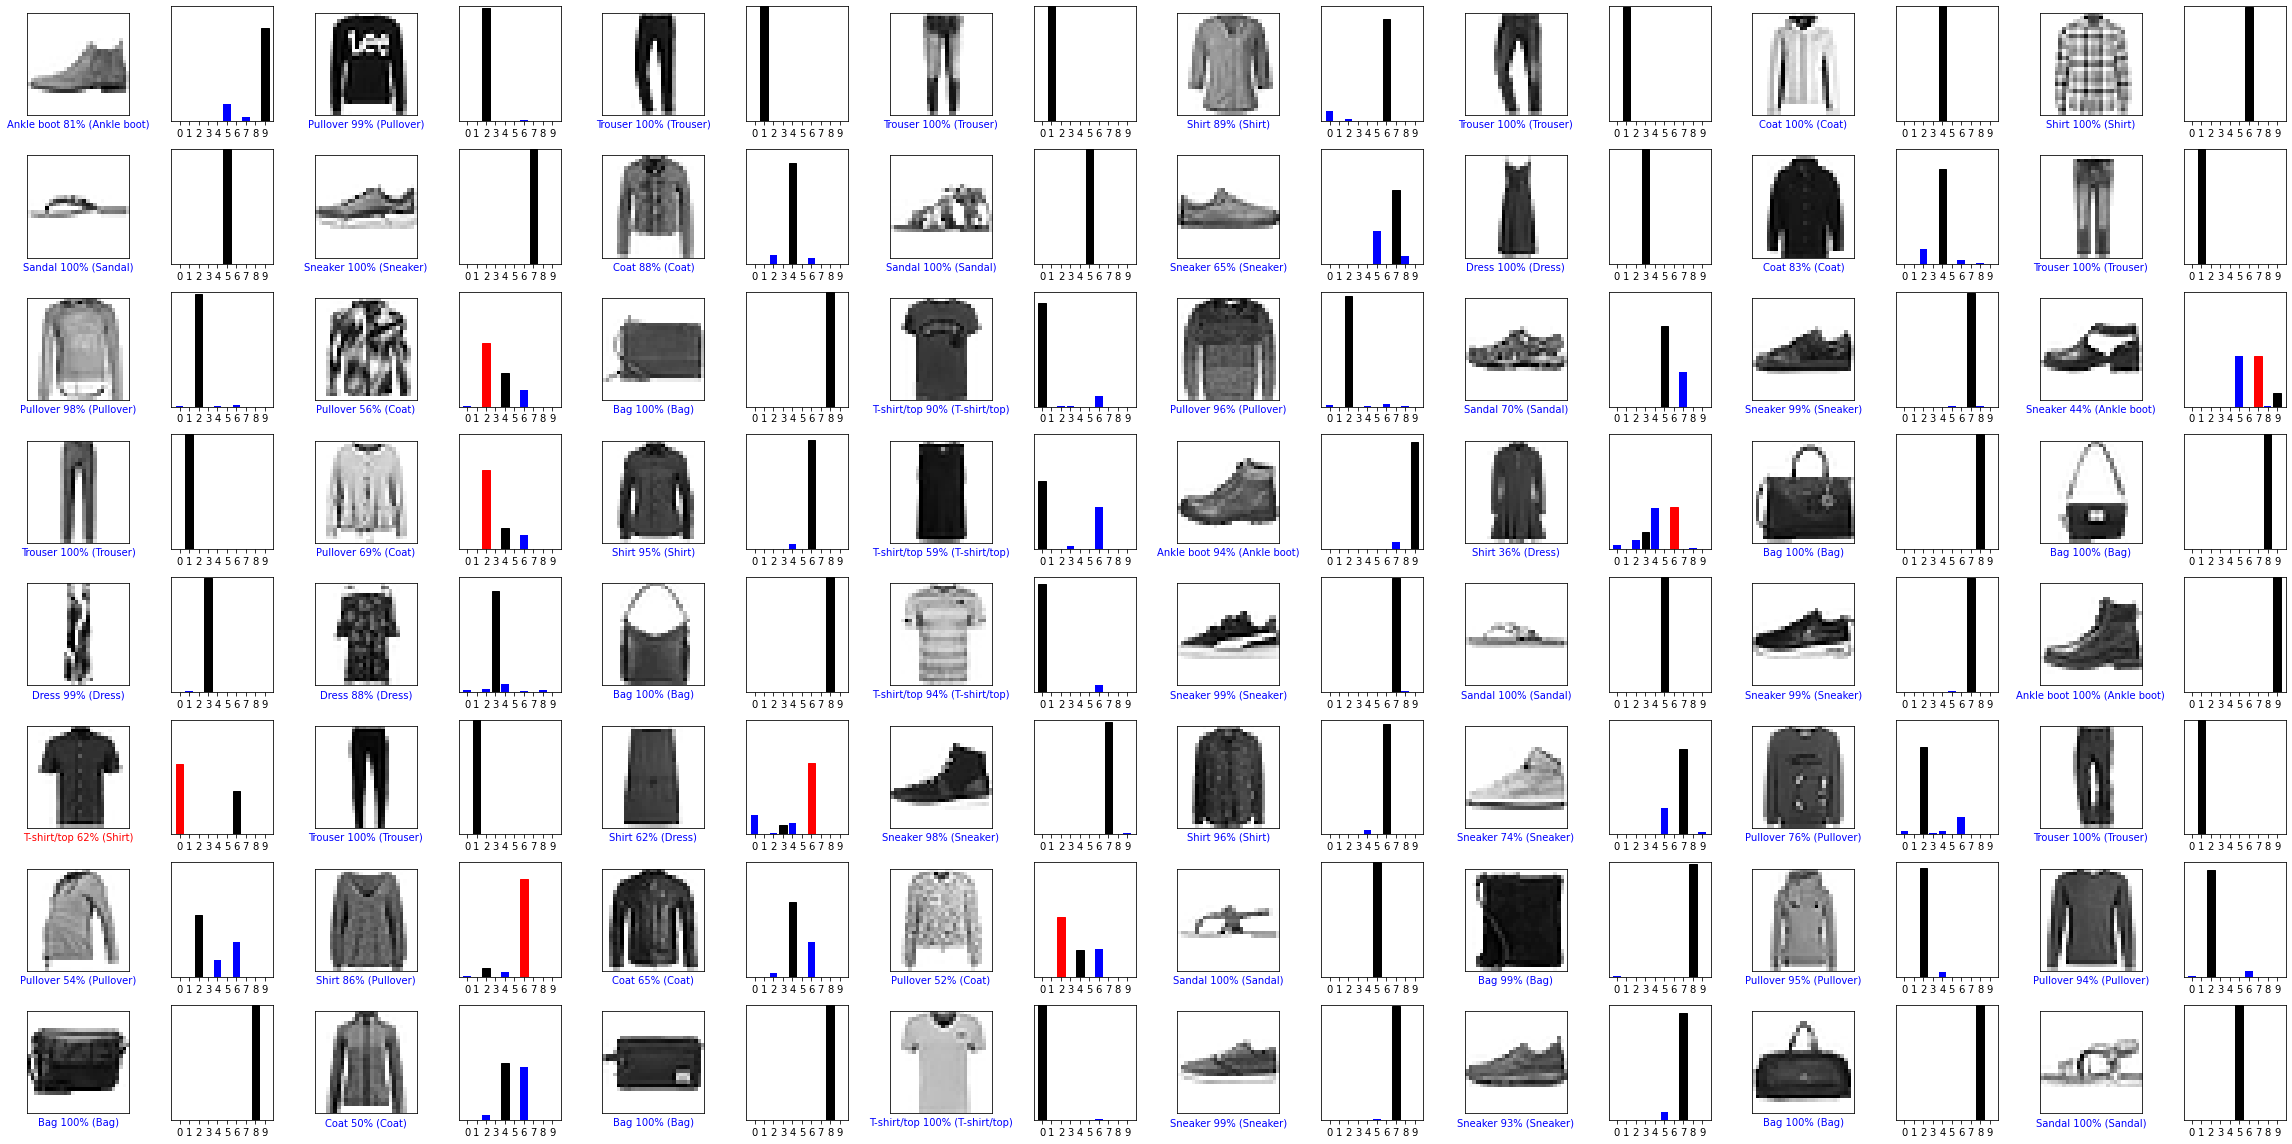

In [73]:
def pintar_conjunto_casos_con_predicciones(num_rows, num_cols, casos):
  num_images = num_rows*num_cols
  for caso in range(casos):
    print("----------------------------------------------------------")
    print("PREDICCIONES CASO ", caso + 1 , " FIGURAS ", num_rows, " x ", num_cols)
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i, prediction[caso][i], test_labels, test_images)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)     
      plot_value_array(i, prediction[caso][i], test_labels)
    plt.tight_layout()
    plt.show()
    print("\n\n")

pintar_conjunto_casos_con_predicciones(8,8,8)

##Mejora del modelo

***7. Mejore el modelo usando el de la configuración del caso 3, pero cambiando el optimizador por ‘adam’ y la función de pérdida ‘sparse_categorical_crossentropy’. Buscar en internet las bases de dicho
optimizador y función de pérdida, explícalos con tus propias palabras y plantea tus reflexiones respecto al resultado.***

Ahora vamos a probar el optimizador `adam`. Recordemos que el optimizador es el algoritmo usado por el modelo para actualizar los pesos de cada una de sus capas en el proceso de entrenamiento. `Adam`, a veces, puede hacer converger mejor el proceso de optimización. Veámoslo:

**Caso 3**

In [74]:
casos = 8
numero_neuronas_primera_capa = [10,10,10,10,512,512,512,512]
funcion_activacion_primera_capa = ['relu','relu','sigmoid','sigmoid','relu','relu','sigmoid','sigmoid']
optimizador =['sgd','rmsprop','sgd','rmsprop','sgd','rmsprop','sgd','rmsprop']
funcion_perdida = ['sparse_categorical_crossentropy', 'sparse_categorical_crossentropy','sparse_categorical_crossentropy',\
                   'sparse_categorical_crossentropy','sparse_categorical_crossentropy','sparse_categorical_crossentropy',\
                   'sparse_categorical_crossentropy','sparse_categorical_crossentropy']
numero_iteraciones = [5,5,5,5,5,5,5,5]
metrica = ['accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy','accuracy']
models = []

for caso in range(casos):
  model = Sequential()
  model.add(Flatten(input_shape=(28, 28)))
  model.add(Dense(numero_neuronas_primera_capa[caso], activation=funcion_activacion_primera_capa[caso]))
  model.add(Dense(10, activation='softmax'))
  models.append(model)

for caso in range(casos):
  models[caso].compile(optimizer='Adam', loss=funcion_perdida[caso], metrics=[metrica[caso]])

for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("NÚMERO NEURONAS PRIMERA CAPA: ",numero_neuronas_primera_capa[caso])
  print("FUNCIÓN ACTIVACIÓN PRIMERA CAPA: ",funcion_activacion_primera_capa[caso])
  print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax")
  print("OPTIMIZADOR: Adam")
  print("FUNCIÓN PÉRDIDA: ",funcion_perdida[caso])
  print("MÉTRICA: ",metrica[caso])
  print("---------------------------------")
  models[caso].fit(train_images, train_labels, epochs=numero_iteraciones[caso])
  print("\n\n")



CASO  1
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR: Adam
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7026 - accuracy: 0.7659
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4757 - accuracy: 0.8360
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4506 - accuracy: 0.8442
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4375 - accuracy: 0.8491
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4260 - accuracy: 0.8526



CASO  2
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR: Adam
FUNCIÓN PÉRDIDA:  sparse_categorical_crosse

In [75]:
test_loss = []
test_acc = []
for caso in range(casos):
  test_loss.append(models[caso].evaluate(test_images,  test_labels)[0])
  test_acc.append(models[caso].evaluate(test_images,  test_labels)[1])

for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("PERDIDA CON LOS DATOS DE TEST: ",test_loss[caso])
  print("PRECISIÓN CON LOS DATOS DE TEST: ",test_acc[caso])
  print("\n\n")

313/313 [==============================] - 1s 3ms/step - loss: 0.3534 - accuracy: 0.8754
CASO  1
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.4594842195510864
PRECISIÓN CON LOS DATOS DE TEST:  0.8411999940872192



CASO  2
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.4668588936328888
PRECISIÓN CON LOS DATOS DE TEST:  0.8348000049591064



CASO  3
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.4471645951271057
PRECISIÓN CON LOS DATOS DE TEST:  0.843500018119812



CASO  4
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.4608400762081146
PRECISIÓN CON LOS DATOS DE TEST:  0.8363000154495239



CASO  5
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.35171249508857727
PRECISIÓN CON LOS DATOS DE TEST:  0.8765000104904175



CASO  6
---------------------------------
PERDIDA CON LOS DATOS DE TEST:  0.36896294355392456
PRECISIÓN CON LOS DATOS DE TEST:  0.8639000058174133



CASO  7
--------

Como vemos, cambiando solo el optimizador ya hemos mejorado un 10% adicional la precisión del modelo, en el caso 3 y sobrepasando el 91% en el caso 8. Esto nos hace pensar que hay muchos elementos a tener en cuenta cuando definimos y configuramos el proceso de aprendizaje de una red neuronal. Con los datos de test, pasamos de un 87% en el caso 8 a un 89% (dos puntos porcentuales, en según que problemas, puede ser la diferencia entre que acepten el proyecto o no, y no digamos nada si nos jugamos miles de euros en una compatición de kaggle)

Veamos ahora el caso de subir el número de iteraciones a 25 para los casos 2 y 7

In [76]:
for caso in range(casos):
  if caso==1 or caso ==6:
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(numero_neuronas_primera_capa[caso], activation=funcion_activacion_primera_capa[caso]))
    model.add(Dense(10, activation='softmax'))
    models.append(model)

for caso in range(casos):
  if caso==1 or caso ==6:
    models[caso].compile(optimizer=optimizador[caso], loss=funcion_perdida[caso], metrics=[metrica[caso]])

for caso in range(casos):
  if caso==1 or caso ==6:
    print("CASO ",caso + 1)
    print("---------------------------------")
    print("NÚMERO NEURONAS PRIMERA CAPA: ",numero_neuronas_primera_capa[caso])
    print("FUNCIÓN ACTIVACIÓN PRIMERA CAPA: ",funcion_activacion_primera_capa[caso])
    print("FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax")
    print("OPTIMIZADOR: ", optimizador[caso])
    print("FUNCIÓN PÉRDIDA: ",funcion_perdida[caso])
    print("MÉTRICA: ",metrica[caso])
    print("---------------------------------")
    models[caso].fit(train_images, train_labels, epochs=25)
    print("\n\n")

test_loss = []
test_acc = []
for caso in range(casos):
  if caso==1 or caso ==6:
    test_loss.append(models[caso].evaluate(test_images,  test_labels)[0])
    test_acc.append(models[caso].evaluate(test_images,  test_labels)[1])

for caso in range(2):
  print("CASO ",caso + 1)
  print("---------------------------------")
  print("PERDIDA CON LOS DATOS DE TEST: ",test_loss[caso])
  print("PRECISIÓN CON LOS DATOS DE TEST: ",test_acc[caso])

CASO  2
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA:  10
FUNCIÓN ACTIVACIÓN PRIMERA CAPA:  relu
FUNCIÓN ACTIVACIÓN ULTIMA CAPA: softmax
OPTIMIZADOR:  rmsprop
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4196 - accuracy: 0.8540
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4149 - accuracy: 0.8558
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4113 - accuracy: 0.8565
Epoch 4/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4090 - accuracy: 0.8574
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4072 - accuracy: 0.8602
Epoch 6/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4040 - accuracy: 0.8611
Epoch 7/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4021 - accuracy: 0.8605
Epoch 

Básicamente, lo que vemos es: 
* Para el caso inicial: 
  - Con los datos de entrenamiento: 
    * El que mejor se comporta con menos pérdida y mayor precisión es el caso 8 (89% de precisión)
    * El que peor se comporta con mayor pérdida y menor precisión es el caso 3 (75% de precisión)
  - Con los datos de Test se sigue dando esta circunstancia (bajando un 1 p.p. la precisión del caso 8)
* Cuando metemos el optimizador Adam tenemos que:
  - Con los datos de entrenamiento: 
    * El que mejor se comporta con menos pérdida y mayor precisión vuelve a ser el caso 8 mejorando en 3 p.p. la precisión (llegando al 92%)
    * El que peor se comporta con mayor pérdida y menor precisión sigue siendo el caso 3 pero mejorando en 10 p.p. la precisión (hasta el 85%)
  - Con los datos de Test se sigue dando esta circunstancia (mejorando un 1 p.p. la precisión del caso 8 para los datos de test con la configuración inicial, pero 8 p.p. para el caso peor que era el 3)
* Para la configuración inicial y las 25 Iteraciones: 
  - Caso 2
    * Para los datos de entrenamiento
      - La pérdida baja 8 p.p.
      - La precisión aumenta 2 p.p.
    * Para los datos de Test
      - La pérdida aumenta 1 p.p.
      - La precisión aumenta 1 p.p.
  - Caso 7
    * Para los datos de entrenamiento
      - La pérdida disminuye 50 p.p.
      - La precisión aumenta 17 p.p. cosa que es espectacular
    * Para los datos de Test
      - La pérdida disminuye 19 p.p. 
      - La precisión aumenta 9 p.p. hasta el 90%

# CONCLUSIONES

A lo largo de este estudio de la Red de Neuronas Artificiales, se han probado diferentes combinaciones de funciones y herramientas internas de Keras con el fin de hallar los componentes que conllevan un entrenamiento óptimo.

Se ha concluido que el modelo más óptimo es el modelo 4 sin lugara a duda.

# REFLEXIONES

Este apartado de la práctica expone los acontecimientos y las dificultades que hemos encontrado como equipo durante su realización. Está compuesto de 3 secciones fuertemente relacionadas entre sí:

## 1.   Cómo hemos afrontado la solución de la práctica





Todo programa de carácter informático contiene dificultades técnicas tales como errores inesperados, o la búsqueda de funciones necesarias no conocidas hasta el momento. Por tanto, hemos tenido que afrontar la subsanación de algunos errores espontáneos, apoyándonos en las prácticas trabajadas en clase y cierta información útil de internet.

Asimismo, se ha logrado una mejor comprensión del funcionamiento de las Redes de Neuronas Artificiales debido a la necesidad de comparar de manera constante nuestro código y conclusiones, con aquellos de otros proyectos. Esto ha desencadenado también en conocer algunos conceptos nuevos gracias a ello.

## 2.   Cómo se ha dividido el trabajo

Anteriormente se han mencionado dificultades que han surgido. Otra de ellas ha sido la imposibilidad de trabajar con varios ordenadores al unísono, por lo que se han tenido que encontrar distintas estrategias a aquellas a las que solemos estar acostumbradas.

Una vez que se había logrado una estructura sólida del estudio, se decidió llevar a cabo el proyecto a através de videollamadas. Esta herramienta permitía a una de nosotras compartir el código por la pantalla, mientras que las demás ayudábamos buscando soluciones con nuestros respectivos ordenadores para avanzar de manera conjunta y eficiente.

A su vez, se compilaba en los demás ordenadores un avez se terminaban las secciones, para asegurarnos de haber subsanado cualquier error que pudiese haber surgido.

## 3.   Cómo se ha gestionado el equipo para trabajar

Siguiendo la línea argumental propuesta, y teniendo en cuenta las similitudes de este apartado con el anterior, explicaremos en más detalle las videollamadas mencionadas.

Nos asignábamos pequeñas tareas - que incluíamos en el proyecto mandándoselas a la compañera con el trabajo abierto, o esperando a incluirlas después - mientras avanzábamos con el código y las conclusiones con el fin de aprovechar el tiempo al máximo.

Sin embargo, tambiém se utilizó tiempo en el que nos encontrábamos físicamente juntas para continuar.

# REFERENCIAS BIBLIOGRÁFICAS

- Apuntes recogidos de GitHub y GoogleColab, a raíz de los contenidos estudiados en el aula